In [57]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps'

# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [60]:
import_path = '/Volumes/Expansion/datasets/Queensland_PD_DBS_STN/derivatives/conn'
file_target= '*nii'

In [68]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target, subject_pattern='LeadDBS')
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/Expansion/datasets/Queensland_PD_DBS_STN/derivatives/conn/*nii


,LeadDBS034_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS060_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS058_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS067_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS051_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS069_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS056_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS035_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS068_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS057_vat_seed_compound_fMRI_func_seed_T.nii,...,LeadDBS085_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS071_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS070_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS084_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS083_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS077_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS048_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS041_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS046_vat_seed_compound_fMRI_func_seed_T.nii,LeadDBS079_vat_seed_compound_fMRI_func_seed_T.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [69]:
pre = 'LeadDBS0'
post = '_vat'

In [70]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,34,60,58,67,51,69,56,35,68,57,...,85,71,70,84,83,77,48,41,46,79
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [74]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/Expansion/datasets/Queensland_PD_DBS_STN/metadata/Clinical/BE_CGN_QU_Clinical_Demographic.xlsx'
sheet= 'MOCA' #'master_list_proper_subjects'

In [78]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,subject,MOCA_Exec_change_PreToFU4_abs,MOCA_Naming_change_PreToFU4_abs,MOCA_Atten_change_PreToFU4_abs,MOCA_Lang_change_PreToFU4_abs,MOCA_Abst_change_PreToFU4_abs,MOCA_Recall_change_PreToFU4_abs,MOCA_Orient_change_PreToFU4_abs,MOCA_Total_change_PreToFU4_abs
0,29,-1,0,1,-2,0,0,0,-2
1,30,-1,0,0,-1,0,0,0,-2
2,31,-1,0,0,0,0,2,0,1
3,34,0,0,-3,-1,0,0,0,-4
4,35,-1,0,0,-1,0,0,0,-2
5,36,-2,1,2,1,0,1,1,4
6,37,-1,0,0,0,0,2,0,1
7,38,0,0,-1,0,-1,0,-1,-3
8,39,0,0,-1,0,0,1,-1,-1
9,40,0,0,1,-2,0,0,0,-1


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [79]:
data_df.columns

Index(['subject', 'MOCA_Exec_change_PreToFU4_abs',
       'MOCA_Naming_change_PreToFU4_abs', 'MOCA_Atten_change_PreToFU4_abs',
       'MOCA_Lang_change_PreToFU4_abs', 'MOCA_Abst_change_PreToFU4_abs',
       'MOCA_Recall_change_PreToFU4_abs', 'MOCA_Orient_change_PreToFU4_abs',
       'MOCA_Total_change_PreToFU4_abs'],
      dtype='object')

In [80]:
drop_list = ['subject', 'MOCA_Exec_change_PreToFU4_abs',
       'MOCA_Naming_change_PreToFU4_abs', 'MOCA_Atten_change_PreToFU4_abs',
       'MOCA_Lang_change_PreToFU4_abs', 'MOCA_Abst_change_PreToFU4_abs',
       'MOCA_Recall_change_PreToFU4_abs', 'MOCA_Orient_change_PreToFU4_abs',
       'MOCA_Total_change_PreToFU4_abs']

In [81]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,MOCA_Exec_change_PreToFU4_abs,MOCA_Naming_change_PreToFU4_abs,MOCA_Atten_change_PreToFU4_abs,MOCA_Lang_change_PreToFU4_abs,MOCA_Abst_change_PreToFU4_abs,MOCA_Recall_change_PreToFU4_abs,MOCA_Orient_change_PreToFU4_abs,MOCA_Total_change_PreToFU4_abs
0,29,-1,0,1,-2,0,0,0,-2
1,30,-1,0,0,-1,0,0,0,-2
2,31,-1,0,0,0,0,2,0,1
3,34,0,0,-3,-1,0,0,0,-4
4,35,-1,0,0,-1,0,0,0,-2
5,36,-2,1,2,1,0,1,1,4
6,37,-1,0,0,0,0,2,0,1
7,38,0,0,-1,0,-1,0,-1,-3
8,39,0,0,-1,0,0,1,-1,-1
9,40,0,0,1,-2,0,0,0,-1


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [82]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to compare against

In [83]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

In [84]:
data_df['subject'] = data_df['subject'].apply(lambda x: x.split('_S_')[1])
data_df


AttributeError: 'int' object has no attribute 'split'

Regress out a Covariate

In [86]:
nimg_df.columns

Index(['34', '60', '58', '67', '51', '69', '56', '35', '68', '57', '50', '66',
       '61', '43', '88', '44', '86', '72', '75', '81', '80', '74', '73', '87',
       '45', '42', '89', '29', '64', '63', '55', '52', '39', '37', '30', '53',
       '54', '62', '91', '65', '31', '36', '38', '47', '78', '40', '76', '82',
       '49', '85', '71', '70', '84', '83', '77', '48', '41', '46', '79'],
      dtype='object')

Regress values out of a Clinical Variable

In [87]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = ['Age']
# regressors = ['DIAGNOSIS_CURRENT']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Regress Values of out the Neuroimaging Variable

In [88]:
# pending

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [89]:
# # Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age',  'Subiculum_Connectivity_T']

In [90]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

Choose Rows to Keep

In [91]:
print(data_df.columns)

Index(['subject', 'MOCA_Exec_change_PreToFU4_abs',
       'MOCA_Naming_change_PreToFU4_abs', 'MOCA_Atten_change_PreToFU4_abs',
       'MOCA_Lang_change_PreToFU4_abs', 'MOCA_Abst_change_PreToFU4_abs',
       'MOCA_Recall_change_PreToFU4_abs', 'MOCA_Orient_change_PreToFU4_abs',
       'MOCA_Total_change_PreToFU4_abs'],
      dtype='object')


In [92]:
subcol = 'subject'

In [93]:
col_to_keep_list = [subcol, 'MOCA_Exec_change_PreToFU4_abs',
       'MOCA_Naming_change_PreToFU4_abs', 'MOCA_Atten_change_PreToFU4_abs',
       'MOCA_Lang_change_PreToFU4_abs', 'MOCA_Abst_change_PreToFU4_abs',
       'MOCA_Recall_change_PreToFU4_abs', 'MOCA_Orient_change_PreToFU4_abs',
       'MOCA_Total_change_PreToFU4_abs']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [94]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc[subcol]
data_df = data_df.drop(subcol)
data_df.dropna(inplace=True, axis=1)
data_df

subject,29,30,31,34,35,36,37,38,39,40,...,81,82,83,84,85,86,87,88,89,91
MOCA_Exec_change_PreToFU4_abs,-1,-1,-1,0,-1,-2,-1,0,0,0,...,0,-1,0,1,-1,-1,1,1,1,1
MOCA_Naming_change_PreToFU4_abs,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MOCA_Atten_change_PreToFU4_abs,1,0,0,-3,0,2,0,-1,-1,1,...,0,0,0,-2,2,0,-1,0,0,2
MOCA_Lang_change_PreToFU4_abs,-2,-1,0,-1,-1,1,0,0,0,-2,...,0,-1,1,0,0,0,1,2,1,0
MOCA_Abst_change_PreToFU4_abs,0,0,0,0,0,0,0,-1,0,0,...,1,1,0,0,0,0,-1,0,0,0
MOCA_Recall_change_PreToFU4_abs,0,0,2,0,0,1,2,0,1,0,...,2,-1,2,4,1,0,0,1,2,2
MOCA_Orient_change_PreToFU4_abs,0,0,0,0,0,1,0,-1,-1,0,...,0,0,0,-1,0,0,0,0,0,-1
MOCA_Total_change_PreToFU4_abs,-2,-2,1,-4,-2,4,1,-3,-1,-1,...,3,-2,3,2,2,-1,0,4,4,4


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [95]:
mask_path = '/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [96]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [97]:
max_stat_method = 'pseudo_var_smooth'

In [99]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
for index, row in data_df.iterrows():
    calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                            variable_dataframe=data_df.loc[[index], :], 
                            mask_threshold=mask_threshold, 
                            mask_path=mask_path, out_dir=out_dir, 
                            method=method, max_stat_method=max_stat_method, vectorize=False)
    calvin_fwe.permutation_test_r_map(n_permutations=1, debug=False)

Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:30<00:00, 30.18s/it]


95th percentile of permuted statistic:  0.4204799956770722
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.75s/it]


95th percentile of permuted statistic:  0.223606797749979
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.71s/it]


95th percentile of permuted statistic:  0.4197682576936076
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.55s/it]


95th percentile of permuted statistic:  0.27509515515667066
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.59s/it]


95th percentile of permuted statistic:  0.31091910956164254
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.40s/it]


95th percentile of permuted statistic:  0.365593696310021
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:28<00:00, 28.91s/it]


95th percentile of permuted statistic:  0.3721661628049115
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Evalauting 59 patients
Spearman vectorization state: False


Permuting:   0%|          | 0/1 [00:00<?, ?it/s]

Evalauting 59 patients
Spearman vectorization state: False


Permuting: 100%|██████████| 1/1 [00:29<00:00, 29.12s/it]


95th percentile of permuted statistic:  0.4573908725137959
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/published_networks/Queensland Cognition Maps


Visualize the FWE Corrected Image


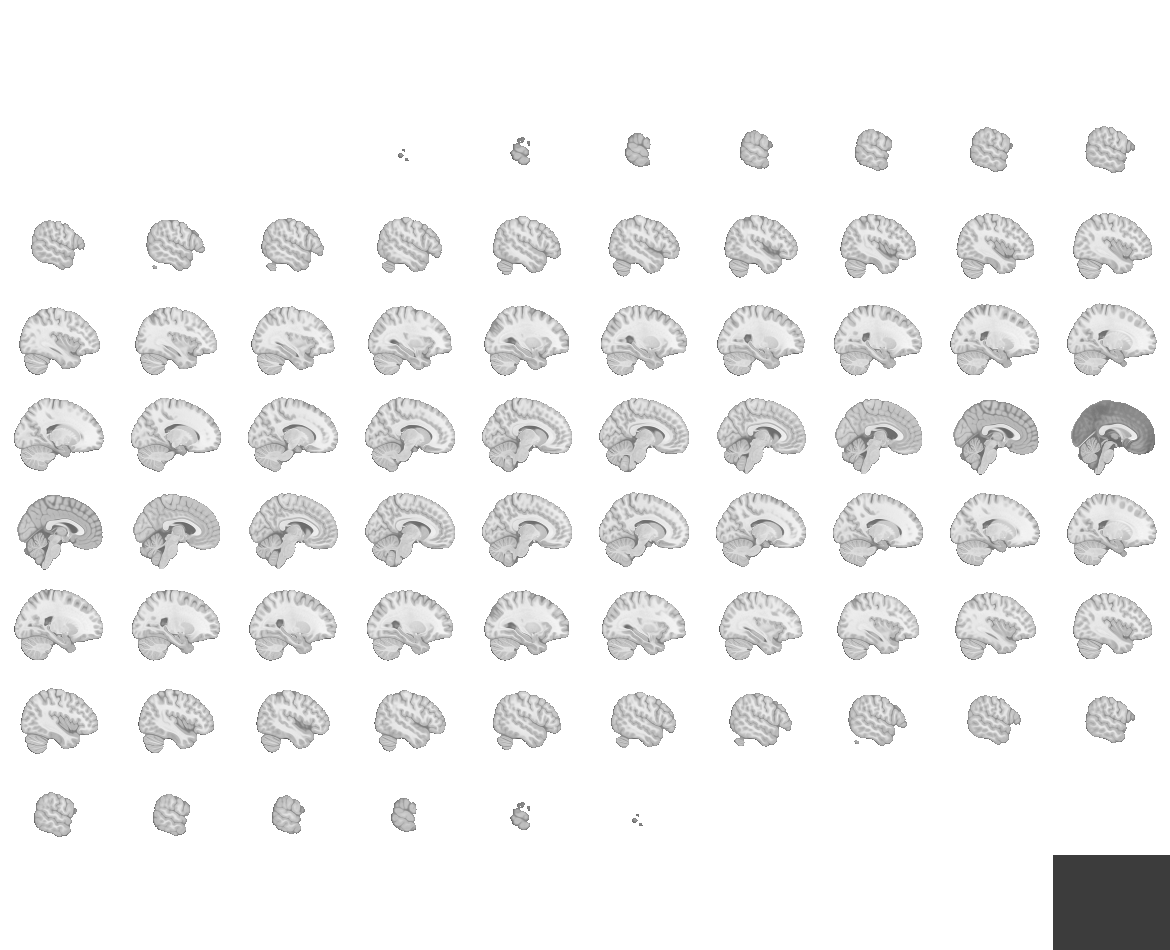
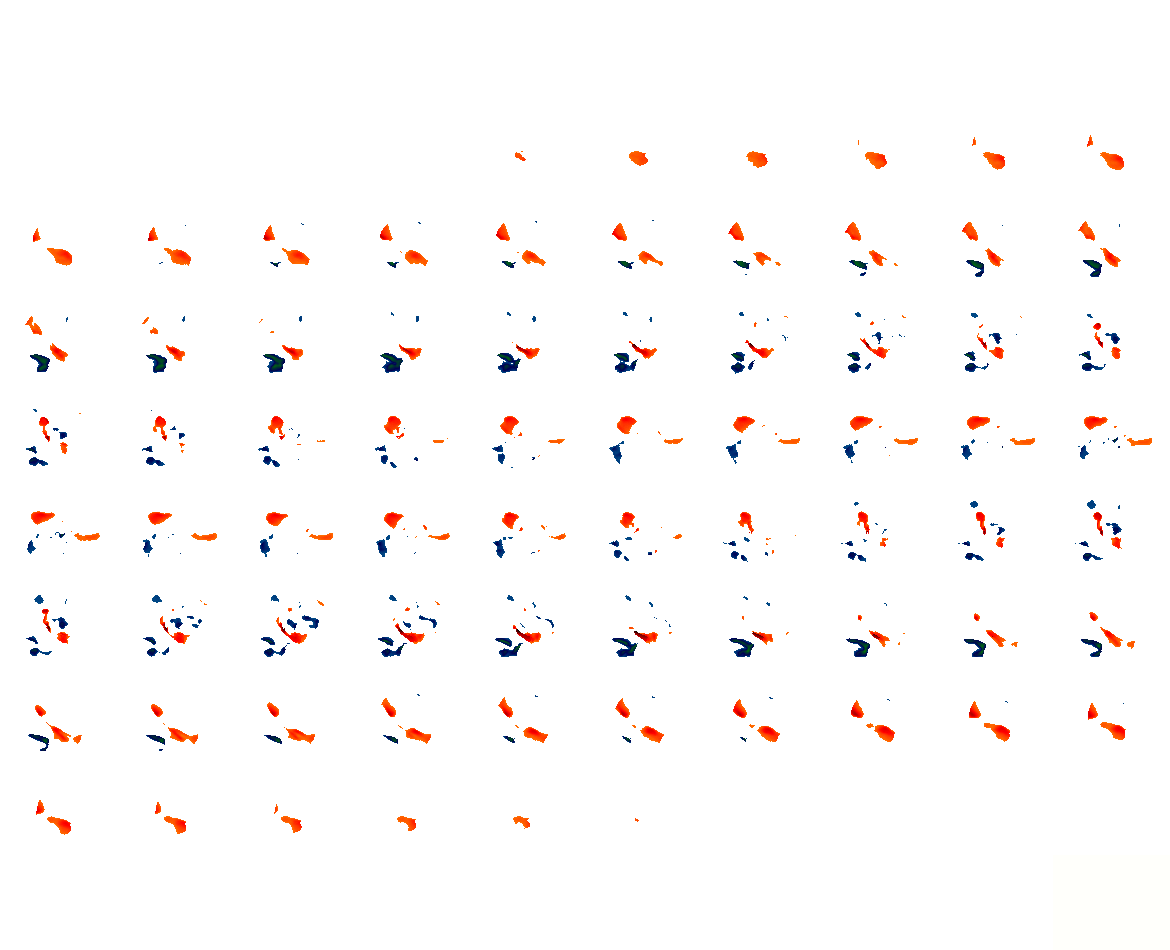

In [54]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


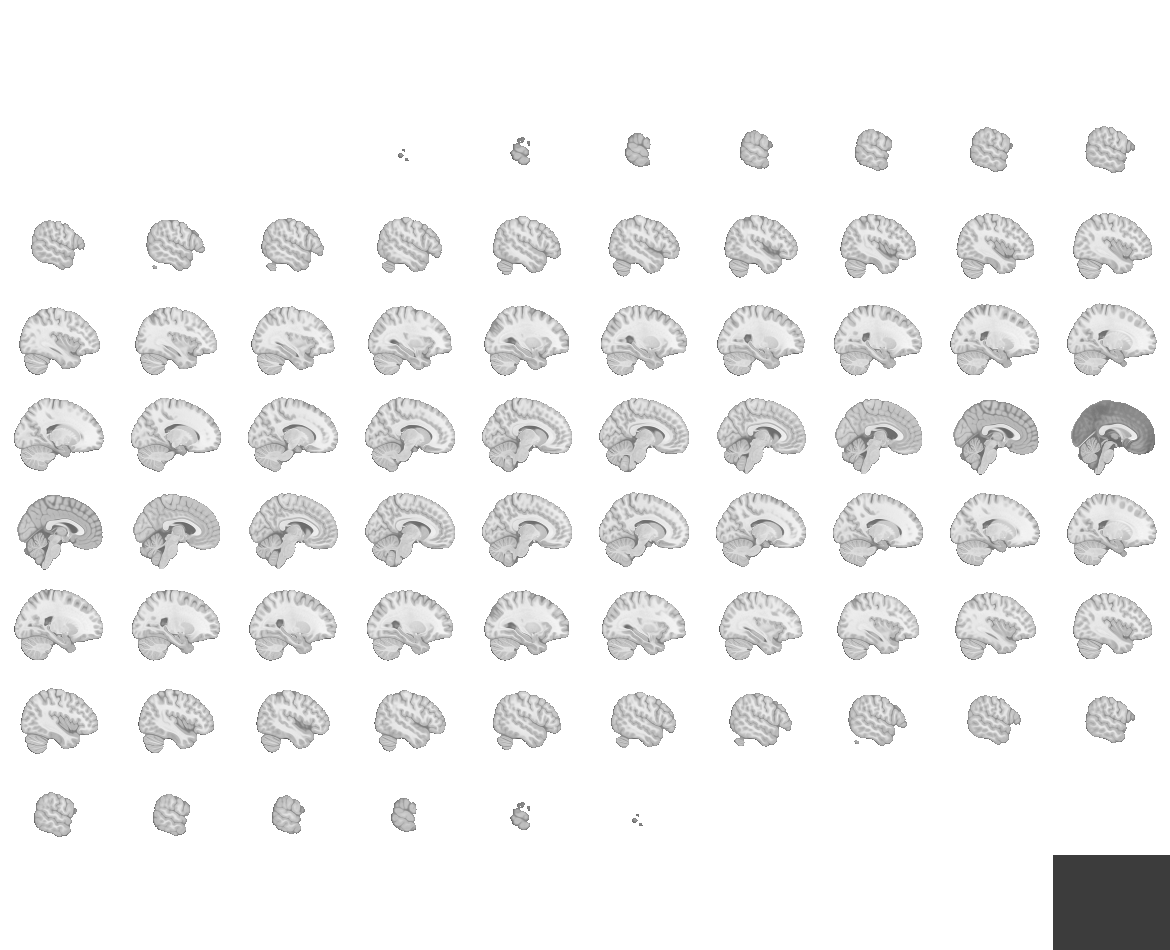
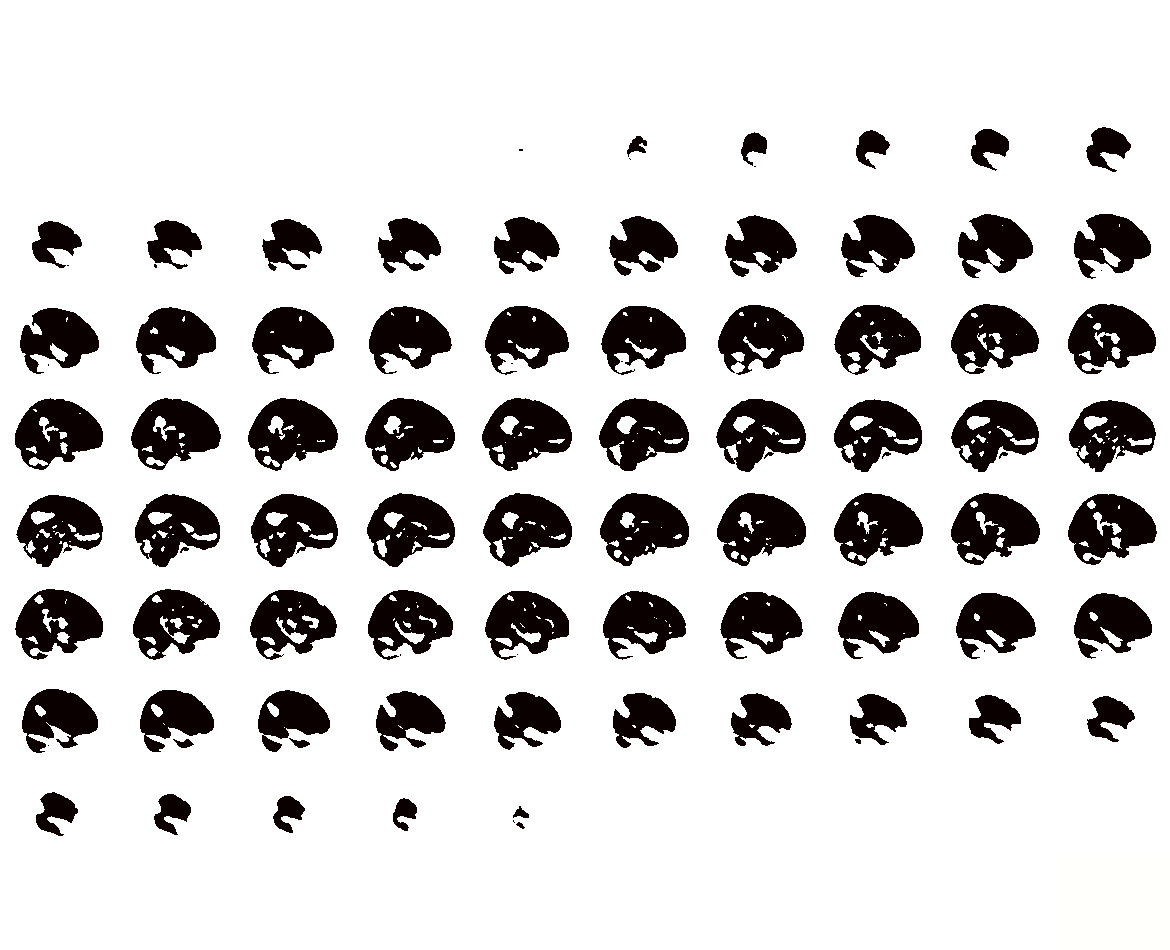

In [55]:
calvin_fwe.p_img

Visualize the Uncorrected Image


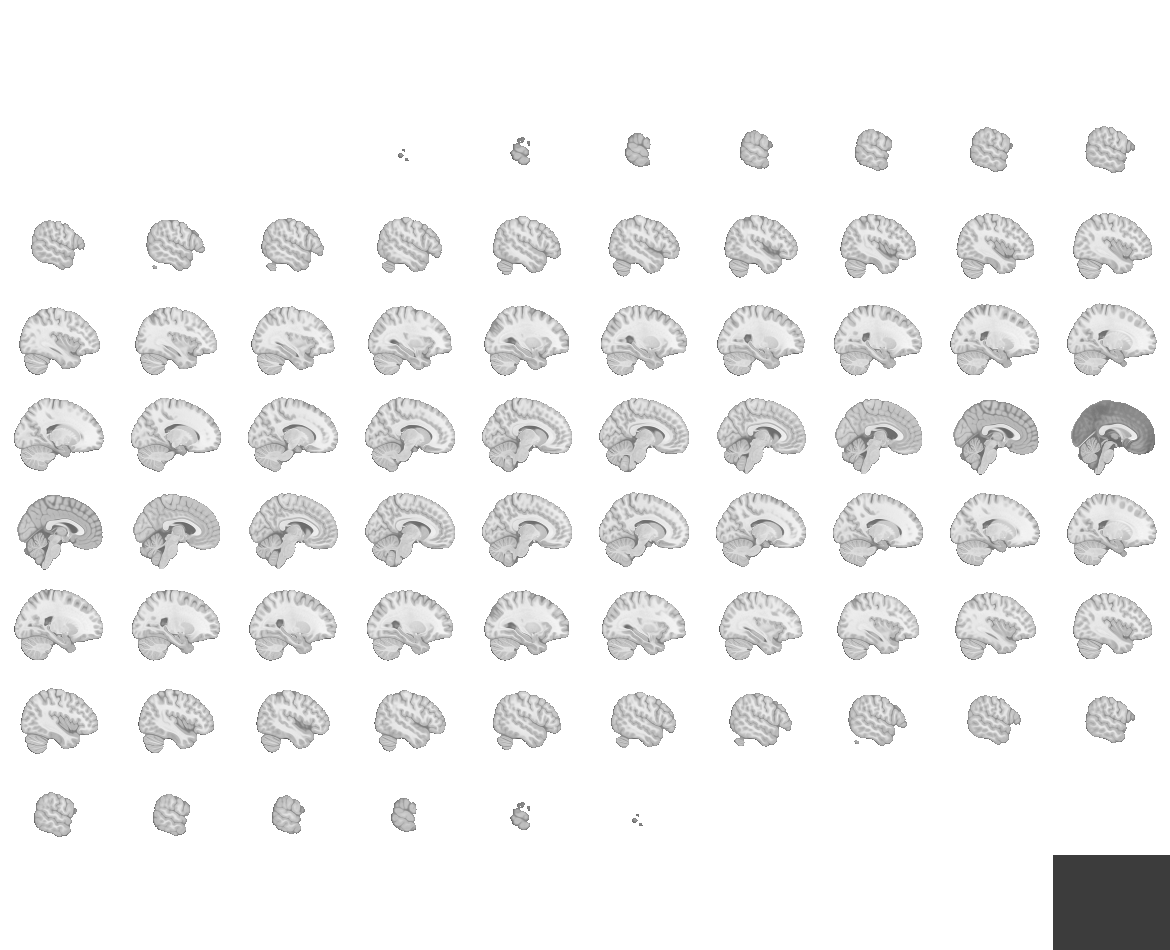
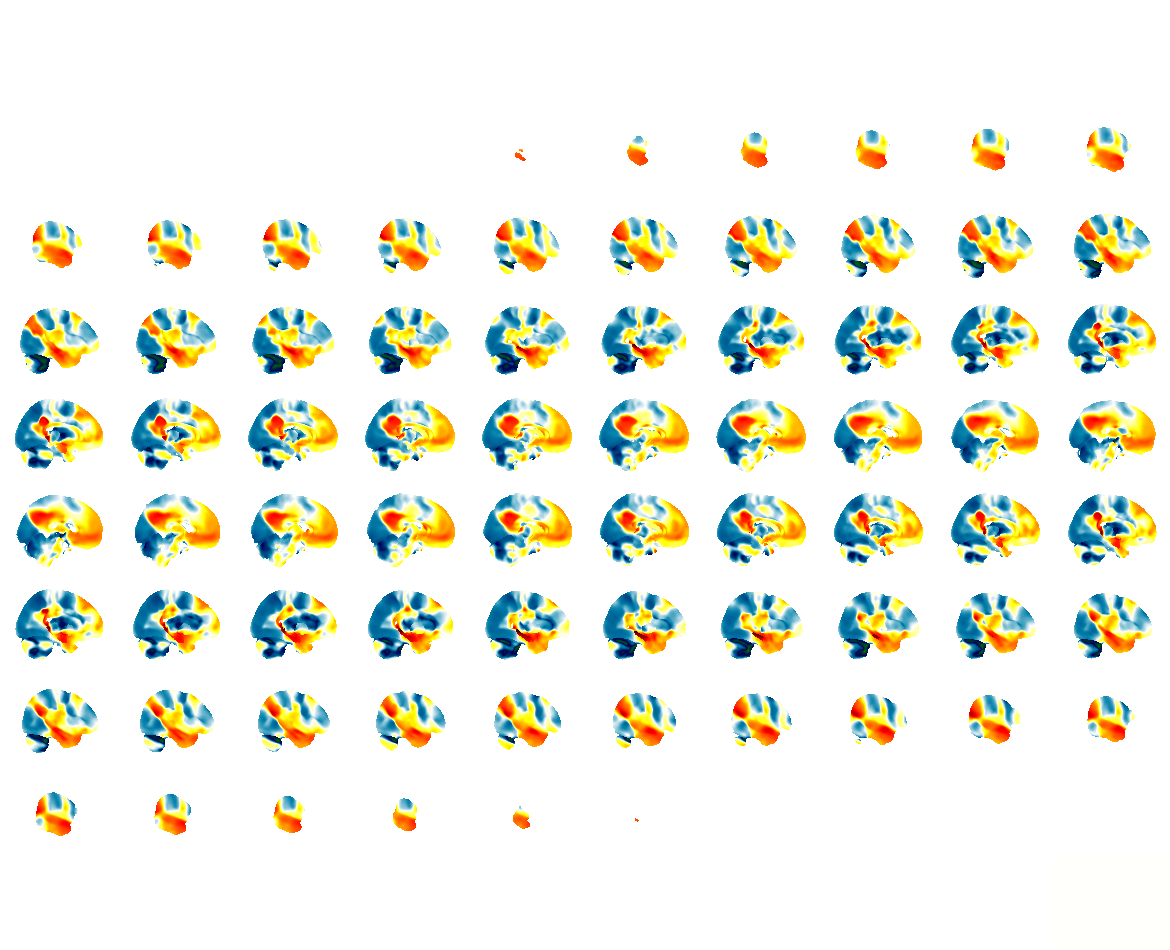

In [56]:
calvin_fwe.uncorrected_img